# TASK 1 : SMS CLASSIFIER

Develope a text classification model to classify SMS as either spam or non-spam using data science techniques in Python.

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
#importing dataset
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\Spam_Detection_Project\spam.csv", encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
#Delete unnecessary columns as we need only first 2
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1, inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Rename the column name for better understanding
data.columns = ['Category', 'Message']

In [8]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
#Counts of ham and spam sms
data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<AxesSubplot:>

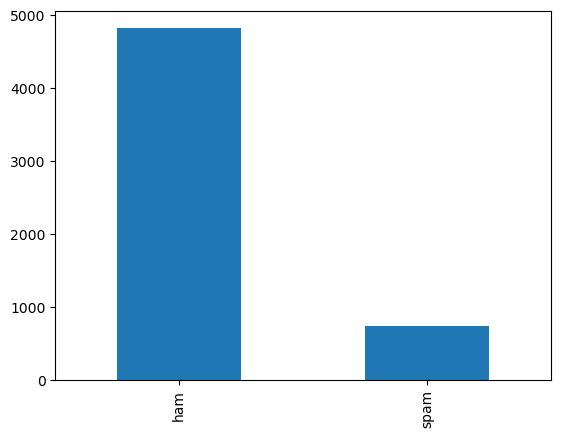

In [11]:
#plot it with the graph
data['Category'].value_counts().plot(kind='bar')

In [12]:
#It seems that Count of ham is more than spam SMS

In [13]:
#Here we create spam column because ML cannot work upon categorical data so we convert it into  binary data mean into numerical data
data['Spam'] = data['Category'].apply(lambda x:1 if x=='spam' else 0)

In [14]:
data.columns

Index(['Category', 'Message', 'Spam'], dtype='object')

In [15]:
data.head(10)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [16]:
import numpy as np
x = np.array(data['Message'])
y = np.array(data["Spam"])
cv = CountVectorizer() #To transform each msg which is a text into vectors based on a frequency or count of each word occured in the msg
X = cv.fit_transform(x )#transform x where message are store into vector using cv object
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


clf = MultinomialNB()
clf.fit(x_train, y_train) #fit the model

MultinomialNB()

In [20]:
sample = input('Enter a message: ')
data = cv.transform([sample]).toarray()
print(clf.predict(data))

Enter a message: WINNER!! As a valued network customer you
[1]


In [18]:
clf.score(x_test,y_test)

0.9784688995215312

In [18]:
#Accuracy score is 97%